In [1]:
import csv
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

Using TensorFlow backend.


In [33]:
DS = pd.read_csv("ObjectSubset150SentenceLength.csv")

In [15]:
len(DS)

157280

In [30]:
52426 + 52426

104852

In [34]:
DS = DS[:104852]

In [35]:
DS['tag'].fillna('text', inplace=True)

In [36]:
DS.head()

,text_ID,word,tag
0,46809,RR,object
1,46809,130/80,object
2,46809,mmHg.,text
3,47482,"RR142/89mmHg,",object
4,47482,HR,text


In [37]:
words = list(set(DS["word"].values))
n_words = len(words);n_words

20160

In [38]:
tags = list(set(DS["tag"].values))
n_tags = len(tags); n_tags


2

In [39]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                           s["tag"].values.tolist())]
        self.grouped = self.data.groupby("text_ID").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [40]:
getter = SentenceGetter(DS)

In [41]:
sentences = getter.sentences

In [42]:
len(sentences)

10404

In [43]:
sentences[1]

[('Pt.', 'text'),
 ('tehtud', 'text'),
 ('3', 'text'),
 ('plasmaferees,', 'text'),
 ('talus', 'text'),
 ('hästi.', 'text'),
 ('Eemaldatud', 'text'),
 ('700', 'text'),
 ('ml', 'text'),
 ('plasmat.', 'text'),
 ('RR', 'object'),
 ('112/60', 'object'),
 ('mmHg.', 'text'),
 ('Tgasi', 'text'),
 ('22.10.09.', 'text')]

In [44]:
max_len = 10
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["O"] = 0


In [45]:
X = [[w[0] for w in s] for s in sentences]


In [46]:
new_X = []
for seq in X:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("__PAD__")
    new_X.append(new_seq)
X = new_X

In [47]:
print(X[1])

['Pt.', 'tehtud', '3', 'plasmaferees,', 'talus', 'hästi.', 'Eemaldatud', '700', 'ml', 'plasmat.']


In [48]:
y = [[tag2idx[w[1]] for w in s] for s in sentences]


In [49]:
from keras.preprocessing.sequence import pad_sequences
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])


In [50]:
tag2idx

{'object': 1, 'text': 2, 'O': 0}

In [51]:
idx2tag = {i: w for w, i in tag2idx.items()}

In [52]:
idx2tag

{1: 'object', 2: 'text', 0: 'O'}

In [53]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=2018)


In [54]:
len(X_tr)

8323

In [55]:
batch_size = 32


In [24]:
# import tensorflow.compat.v1 as tf
# from keras import backend as K

# # import tensorflow_hub as hub
# # from keras import backend as K
# # sess = tf.Session()

# # init = tf.global_variables_initializer() # This reinitializes keras weights, so must be put before Keras loading
# sess.run(init)
# sess.run(tf.global_variables_initializer())
# K.set_session(sess)

import tensorflow as tf
import tensorflow_hub as hub
from keras import backend as K


In [25]:
# sess = tf.Session()
# K.set_session(sess)


In [26]:
from allennlp.modules.elmo import Elmo, batch_to_ids
options_file = "options.json"
weight_file = "swb_weights.hdf5"
elmo_model  = Elmo(options_file, weight_file, 2, dropout=0)


In [51]:
# import tensorflow_hub as hub 


In [41]:
# # tf.disable_eager_execution()

# elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)


In [48]:
# from keras.models import Model, Input
# from keras.layers.merge import add
# from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda


In [ ]:
X_tr_character_ids = batch_to_ids(X_tr)
X_tr_embeddings = elmo_model(X_tr_character_ids)

X_te_character_ids = batch_to_ids(X_te)
X_te_embeddings = elmo_model(X_te_character_ids)

In [47]:
# sess.run(tf.compat.v1.global_variables_initializer())
# sess.run(tf.compat.v1.tables_initializer())

In [45]:
# def ElmoEmbedding(x):
#     return elmo_model(inputs={
#                             "tokens": tf.squeeze(tf.cast(x, tf.string)),
#                             "sequence_len": tf.constant(batch_size*[max_len])
#                       },
# #                       signature="tokens",
#                       as_dict=True)["elmo"]


In [39]:
# from keras.models import Model, Input
# from keras.layers.merge import add
# from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda


In [51]:
# input_text = Input(shape=(max_len,), dtype=tf.string)
# embedding = Lambda(ElmoEmbedding, output_shape=(None, 1024))(input_text)
# x = Bidirectional(LSTM(units=512, return_sequences=True,
#                        recurrent_dropout=0.2, dropout=0.2))(embedding)
# x_rnn = Bidirectional(LSTM(units=512, return_sequences=True,
#                            recurrent_dropout=0.2, dropout=0.2))(x)
# x = add([x, x_rnn])  # residual connection to the first biLSTM
# out = TimeDistributed(Dense(n_tags, activation="softmax"))(x)


In [ ]:
X_tr_embeddings["elmo_representations"][1].shape

In [ ]:
y_tr.shape

In [ ]:
# model = Sequential()
# model.add(LSTM(12, input_shape=(10, 10, 3), return_sequences=True))


In [ ]:
n_tags

In [ ]:
y_te.reshape(217,10,1).shape

In [262]:
from keras.models import Sequential
from keras.layers import LSTM, core, Activation, Dense
import numpy as np
from keras.layers import Bidirectional, concatenate, SpatialDropout1D, GlobalMaxPooling1D


model = Sequential()
model.add(LSTM(1024, input_shape=(10, 1024), return_sequences=True,recurrent_dropout=0.2, dropout=0.2))

model.add(TimeDistributed(Dense(3, activation='softmax')))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [263]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 10, 1024)          8392704   
_________________________________________________________________
time_distributed_30 (TimeDis (None, 10, 3)             3075      
Total params: 8,395,779
Trainable params: 8,395,779
Non-trainable params: 0
_________________________________________________________________


In [264]:
X_tr_embeddings['elmo_representations'][1].detach().numpy().shape

(868, 10, 1024)

In [175]:
# y_tr.reshape(868,10,1)

In [265]:
history = model.fit(X_tr_embeddings['elmo_representations'][1].detach().numpy(), y_tr.reshape(868,10,1),validation_split=0.1 ,verbose=1,epochs=5,batch_size=32)

Train on 781 samples, validate on 87 samples
Epoch 1/5
781/781 [==============================] - 9s 11ms/step - loss: 0.2638 - accuracy: 0.9004 - val_loss: 0.1196 - val_accuracy: 0.9575
Epoch 2/5
781/781 [==============================] - 8s 11ms/step - loss: 0.1336 - accuracy: 0.9496 - val_loss: 0.1083 - val_accuracy: 0.9609
Epoch 3/5
781/781 [==============================] - 8s 11ms/step - loss: 0.1095 - accuracy: 0.9561 - val_loss: 0.1188 - val_accuracy: 0.9586
Epoch 4/5
781/781 [==============================] - 8s 10ms/step - loss: 0.0933 - accuracy: 0.9639 - val_loss: 0.1180 - val_accuracy: 0.9621
Epoch 5/5
781/781 [==============================] - 8s 11ms/step - loss: 0.0823 - accuracy: 0.9675 - val_loss: 0.1277 - val_accuracy: 0.9575


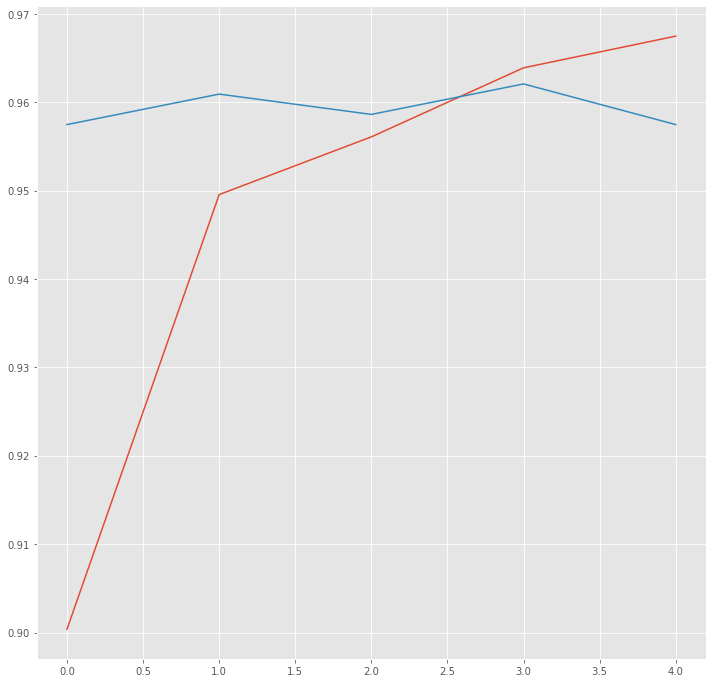

In [266]:
hist = pd.DataFrame(history.history)
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.show()


In [267]:
y_pred = model.predict(X_te_embeddings['elmo_representations'][1].detach().numpy(),verbose=1)

217/217 [==============================] - 0s 2ms/step


In [268]:
y_pred[1]

array([[1.7902514e-04, 1.7515193e-03, 9.9806947e-01],
       [7.1622303e-04, 9.6984911e-01, 2.9434677e-02],
       [1.5145190e-03, 9.6857053e-01, 2.9914927e-02],
       [9.5559881e-05, 1.4969301e-03, 9.9840754e-01],
       [1.5758256e-04, 6.7203003e-04, 9.9917042e-01],
       [9.9975997e-01, 5.1846405e-06, 2.3476833e-04],
       [9.9999118e-01, 3.2546311e-08, 8.8626111e-06],
       [9.9999559e-01, 5.9164762e-09, 4.4365238e-06],
       [9.9999726e-01, 2.9751832e-09, 2.7514545e-06],
       [9.9999642e-01, 3.9774672e-09, 3.5358198e-06]], dtype=float32)

In [269]:
y_te[1]

array([2, 1, 1, 2, 2, 0, 0, 0, 0, 0])

In [270]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p, axis=-1)
            out_i.append(idx2tag[p_i])
        out.append(out_i)
    return out
pred_labels = pred2label(y_pred)

def pred2labelV2(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            out_i.append(idx2tag[p])
        out.append(out_i)
    return out
test_labels = pred2labelV2(y_te)

In [273]:
# i = 4
# p = np.argmax(y_pred[i], axis=-1)
# print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
# print(30 * "=")
# for w, t, pred in zip(X_tr_embeddings[i], y_te[i], p):
#     if w != 0:
#         print("{:15}: {:5} {}".format(w, t, pred))


In [ ]:
y_pred

In [275]:
from  sklearn_crfsuite.metrics import flat_classification_report  
report = flat_classification_report(y_pred=pred_labels, y_true=test_labels)
print(report)

              precision    recall  f1-score   support

           O       1.00      1.00      1.00       757
      object       0.75      0.59      0.66       166
        text       0.95      0.97      0.96      1247

    accuracy                           0.95      2170
   macro avg       0.90      0.85      0.87      2170
weighted avg       0.95      0.95      0.95      2170



In [276]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

F1-score: 69.5%


In [277]:
print(classification_report(test_labels, pred_labels))

           precision    recall  f1-score   support

     text       0.75      0.73      0.74       275
   object       0.60      0.53      0.56        96

micro avg       0.72      0.68      0.70       371
macro avg       0.71      0.68      0.69       371



In [ ]:
sentences = [['minu', 'nimi' ,'on', 'nesma', 'hästi', 'Eemaldatud', '700', 'ml', 'plasmat','RR',' 112/60',' mmHg'], ['Pt.', 'tehtud' ,'plasmaferees', 'talus', 'hästi']]
character_ids = batch_to_ids(sentences)
embeddings = elmo(character_ids)

In [ ]:
embeddings['elmo_representations'][1].shape

In [ ]:
embeddings['elmo_representations'][1][1][4].detach().numpy()

In [ ]:
scipy.spatial.distance.cosine(embeddings['elmo_representations'][1][1][4].detach().numpy(),embeddings['elmo_representations'][1][1][1].detach().numpy())